
## 8.5 Eigendecomposition

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([[4,2], [-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [5]:
lamdas, V = np.linalg.eig(A)
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [12]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [9]:
Lamda = np.diag(lamdas)
Lamda

array([[ 2.,  0.],
       [ 0., -1.]])

confirm that A = V*Lamda*V^-1

In [13]:
np.dot(V, np.dot(Lamda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Not all matrices can be eigendecompossed; in some cases when it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers.

In ML, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If A is a real symmetric matrix then..

$ A = Q * LAMDA * Q^(-1) $

In [14]:
A = np.array([[2,1], [1,2]])
A

array([[2, 1],
       [1, 2]])

In [18]:
lambdas, Q = np.linalg.eig(A)
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [19]:
lambdas

array([3., 1.])

In [21]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

Remember Q^T Q = QQ^T = I, can demonstrate that Q is an orthogonal matrix.

In [22]:
np.dot(Q.T, Q)

array([[1., 0.],
       [0., 1.]])

In [23]:
np.dot(Q, Q.T)

array([[1., 0.],
       [0., 1.]])

Let's confirm $ A = Q * LAMBDA * Q^T $ :

In [24]:
np.dot(Q, np.dot(Lambda,Q.T))

array([[2., 1.],
       [1., 2.]])

# Ch. 9 Machine Learning with Linear Algebra

This codes is based on the explanation of __Lesson 9__ Linear Algebra for ML, Jon Krohn

9.1 Single Value Decomposition (SVD)

A_(mxn) = U_(mxm) * D_(nxn) * V_(mxn)^T



In [41]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [27]:
U, d, VT = np.linalg.svd(A)

In [28]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [29]:
d

array([8.66918448, 4.10429538])

In [30]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [32]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [35]:
D = np.concatenate((np.diag(d), [[0,0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [36]:
np.dot(U, np.dot(D,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

## 9.3 The Moore-Penrose Pseudoinverse

Check again 'Matrix Inversion'

> note that solving equation may still be possible by other means if matrix can't be inverted.

For some matrix A, its pseudoinverse A^+ ca be computed by:

A^+ = VD+U^T
Where:




In [42]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [43]:
U, d, VT = np.linalg.svd(A)

In [44]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [47]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [48]:
d

array([8.66918448, 4.10429538])

To create D+, we firts invert the non-zero values of d:

In [50]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [52]:
1/D[0,0]

0.11535110399365107

In [53]:
1/D[1,1]

0.2436471814566598

.... and then we would take the transpose of the resulting matrix.
Because _D_ is a diagonal matrix, this can, however, be done in a single step by inverting _D_:

In [54]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

The final D^+ matrix needs to have a shape that can undergo matrix multiplication in the A^+ = V D^+ U^T equation. These dimensions can be obtained from A:

In [55]:
A.shape[0]

3

In [56]:
A.shape[1]

2

In [59]:
Dplus = np.zeros((3,2)).T
Dplus

array([[0., 0., 0.],
       [0., 0., 0.]])

In [61]:
Dplus[:2, :2] = Dinv
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

Now we have everything in need to calculate A+ with VD^+U^T:

In [62]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but surprisingly Numpy is loaded with an existing method `pinv()`:

In [63]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

## 9.4 Regression via Pseudoinverse

For regression problems, we typically have many more cases (n, or rows of X) than features to predict (m, or columns of X). Let's solve a miniature example of such an overdetermined situation.

We have eight data points (n = 8) :

In [65]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # #n dose of drug
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # Patient's forgetfullness

In [66]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfullness'


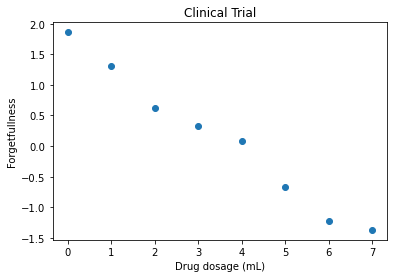

In [74]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

In [75]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

In [81]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

In [83]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999993

In [84]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857141

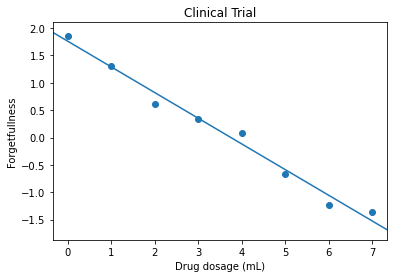

In [85]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_min, y_max = m*x_min + b, m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_min, y_max])

## 9.5 Principal Component Analysis

* Simple ML algorithm
* unsupervised: enables identification of structure in unlabeled data
* like eigendecomposition and SVD, enables lossy compression

In [87]:
from sklearn import datasets
iris = datasets.load_iris()

In [88]:
iris.data.shape

(150, 4)

In [89]:
iris.get('feature_names')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [91]:
iris.data[0:6, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA(n_components=2) #specify how many PC used

In [94]:
X = pca.fit_transform(iris.data)

In [95]:
X.shape

(150, 2)

In [96]:
X[0:6, :]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

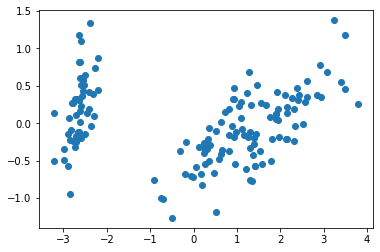

In [98]:
plt.scatter(X[:, 0], X[:, 1])

In [99]:
iris.target.shape

(150,)

In [100]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [101]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [102]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

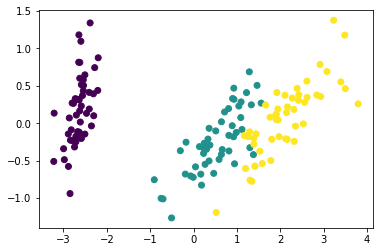

In [103]:
plt.scatter(X[:, 0], X[:,1], c=iris.target)